# 采样
 - 上采样(过采样)
 - 下采样(降采样)

<img src="images/01.png" />

# 一、过采样
### 1、随机过采样

In [1]:
from sklearn.datasets import make_classification
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
X, y = make_classification(n_samples=50, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=0)

In [2]:
Counter(y)

Counter({2: 47, 1: 2, 0: 1})

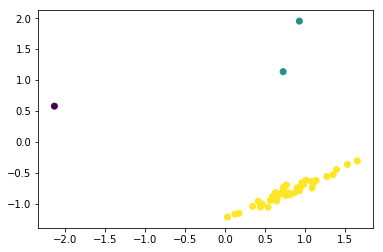

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)

安装imblearn：pip install imblearn

In [4]:
from imblearn.over_sampling import RandomOverSampler
 
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


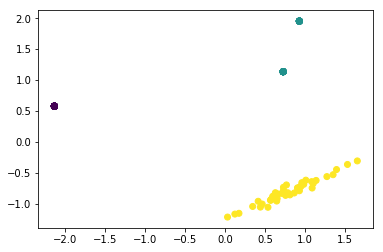

In [5]:
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled)

In [8]:
Counter(y_resampled)

Counter({2: 47, 1: 47, 0: 47})

### 2、SMOTE（Synthetic Minority Oversampling Technique）
即合成少数类过采样技术，它是基于随机过采样算法的一种改进方案，SMOTE算法的基本思想是对少数类样本进行分析并根据少数类样本人工合成新样本添加到数据集中。

In [7]:
X, y =  make_classification(n_samples=1000, n_features=2, 
                           n_informative=2, n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94],
                           random_state=500)


In [8]:
Counter(y)

Counter({2: 930, 1: 57, 0: 13})

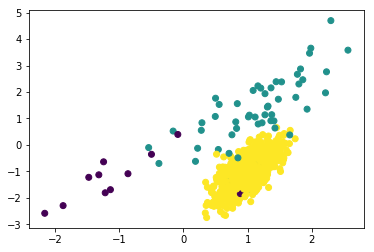

In [117]:
plt.scatter(X[:,0],X[:,1],c=y)

In [118]:
from imblearn.over_sampling import SMOTE
 
X_resampled_smote, y_resampled_smote = SMOTE().fit_sample(X, y)

In [119]:
Counter(y_resampled_smote)

Counter({2: 930, 1: 930, 0: 930})

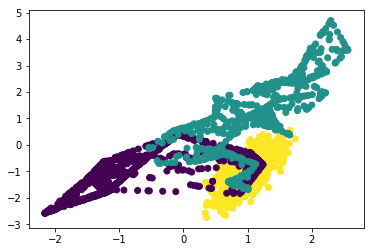

In [120]:
plt.scatter(X_resampled_smote[:,0],X_resampled_smote[:,1],c=y_resampled_smote)

### 4、Border-line SMOTE
SMOTE会随机选取少数类样本用以合成新样本，而不考虑周边样本的情况，这样容易带来两个问题：

- 如果选取的少数类样本周围也都是少数类样本，则新合成的样本不会提供太多有用信息。这就像支持向量机中远离margin的点对决策边界影响不大。
- 如果选取的少数类样本周围都是多数类样本，这类的样本可能是噪音，则新合成的样本会与周围的多数类样本产生大部分重叠，致使分类困难。

总的来说我们希望新合成的少数类样本能处于两个类别的边界附近，这样往往能提供足够的信息用以分类。而这就是下面的 Border-line SMOTE 算法要做的事情。

#### 这个算法会先将所有的少数类样本分成三类，如下图所示：

- "noise" ： 所有的k近邻个样本都属于多数类
- "danger" ： 超过一半的k近邻样本属于多数类
- "safe"： 超过一半的k近邻样本属于少数类

<img src="images/02.png"/>

<b>Border-line SMOTE</b>算法只会从处于”danger“状态的样本中随机选择，然后用SMOTE算法产生新的样本。处于”danger“状态的样本代表靠近”边界“附近的少数类样本，而处于边界附近的样本往往更容易被误分类。因而 Border-line SMOTE 只对那些靠近”边界“的少数类样本进行人工合成样本，而 SMOTE 则对所有少数类样本一视同仁。

<b>Border-line SMOTE</b> 分为两种: Borderline-1 SMOTE</b> 和 <b>Borderline-2 SMOTE</b>。 <b>Borderline-1 SMOTE</b> 在合成样本时所选的近邻是一个少数类样本，<b>而 Borderline-2 SMOTE</b> 中所选的k近邻中的是任意一个样本。

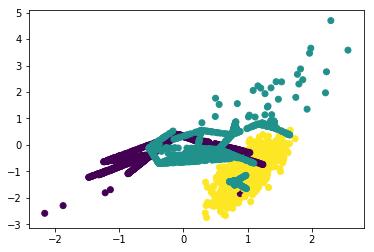

In [121]:
X_resampled_smote, y_resampled_smote = SMOTE(kind="borderline1").fit_sample(X, y)
plt.scatter(X_resampled_smote[:,0],X_resampled_smote[:,1],c=y_resampled_smote)

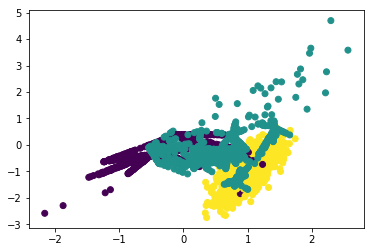

In [122]:
X_resampled_smote, y_resampled_smote = SMOTE(kind="borderline2").fit_sample(X, y)
plt.scatter(X_resampled_smote[:,0],X_resampled_smote[:,1],c=y_resampled_smote)

### 3、ADASYN：自适应合成抽样(adaptive synthetic sampling)
这种改进方法的主要思想是根据数据分布情况为不同的少数类样本生成不同数量的新样本。首先根据最终的平衡程度设定总共需要生成的新少数类样本数量 ，然后为每个少数类样本x计算分布比例。

In [123]:
from imblearn.over_sampling import ADASYN

X_resampled_adasyn, y_resampled_adasyn = ADASYN().fit_sample(X, y)

In [124]:
Counter(y_resampled_adasyn)

Counter({2: 930, 1: 923, 0: 928})

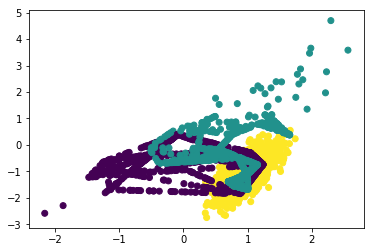

In [125]:
plt.scatter(X_resampled_adasyn[:,0],X_resampled_adasyn[:,1],c=y_resampled_adasyn)

# 二、下采样(降采样)
### 1、原型生成(prototype generation)
给定数据集S, 原型生成算法将生成一个子集S’, 其中|S’| < |S|, 但是子集并非来自于原始数据集. 意思就是说: 原型生成方法将减少数据集的样本数量, 剩下的样本是由原始数据集生成的, 而不是直接来源于原始数据集.

In [126]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_sample(X, y)

In [127]:
Counter(y_resampled)

Counter({0: 13, 1: 13, 2: 13})

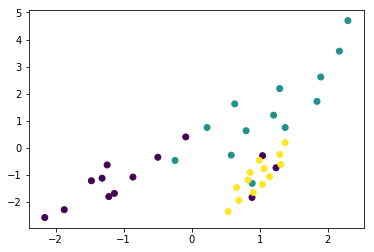

In [128]:
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled)

### 2、原型选择(prototype selection)
原型选择算法是直接从原始数据集中进行抽取

In [129]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_sample(X, y)

In [130]:
Counter(y_resampled)

Counter({0: 13, 1: 13, 2: 13})

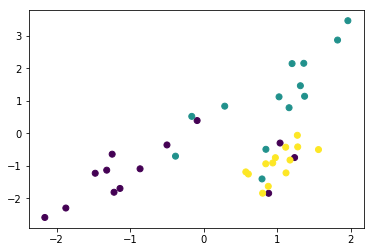

In [131]:
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled)

### 3、NearMiss
NearMiss本质上是一种原型选择(prototype selection)方法，即从多数类样本中选取最具代表性的样本用于训练，主要是为了缓解随机欠采样中的信息丢失问题。NearMiss采用一些启发式的规则来选择样本，根据规则的不同可分为3类：

- NearMiss-1：选择到最近的K个少数类样本平均距离最近的多数类样本
- NearMiss-2：选择到最远的K个少数类样本平均距离最近的多数类样本
- NearMiss-3：对于每个少数类样本选择K个最近的多数类样本，目的是保证每个少数类样本都被多数类样本包围

#### 不同NearMiss类别通过version参数设置

In [132]:
from imblearn.under_sampling import NearMiss
nm1 = NearMiss(random_state=0, version=1)
X_resampled_nm1, y_resampled = nm1.fit_sample(X, y)

In [133]:
Counter(y_resampled)

Counter({0: 13, 1: 13, 2: 13})

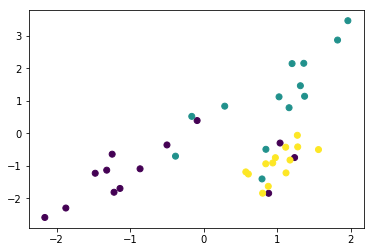

In [134]:
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled)

# 三、过采样与下采样的结合

### 1、SMOTEENN

In [135]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_sample(X, y)

In [136]:
Counter(y_resampled)

Counter({0: 763, 1: 783, 2: 627})

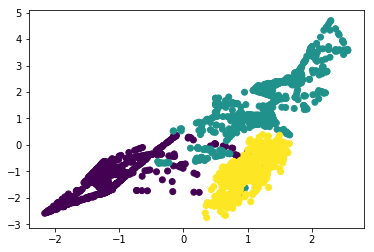

In [137]:
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled)

2、SMOTETomek

In [138]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote_tomek.fit_sample(X, y)

In [139]:
Counter(y_resampled)

Counter({2: 863, 1: 885, 0: 890})

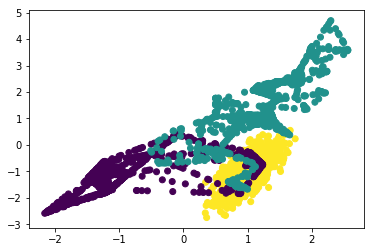

In [140]:
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled)